# Harmonic Oscillator

We have already shown how to solve for the energy levels of a harmonic oscillator (Equation 1).

$$ E = h \nu\left(n+\frac{1}{2}\right) \qquad \nu = \frac{1}{2 \pi}\sqrt{\frac{k}{\mu}} \qquad n = 0, 1, 2... \qquad \left(1\right) $$

At finite temperatures $T$, the energy levels of a harmonic oscillator are populated according to a Boltzmann population distribution, 

$$P_i = \frac{e^\frac{-iE}{k_BT}}{Q} \qquad \left(2\right) $$

in which 

$$Q = \sum_{j=1}^{n}e^\frac{-jE}{k_BT} \qquad \left(3\right) $$

Boltzmann populations can be combined with the dependences of thermodynamic quantities on Q to develop the temperature dependence of several quantities. Namely, the average energy (Eqn. 4), the enthalpy (Eqn. 5), the entropy (Eqn. 6), Gibbs free energy (Eqn. 7), and the heat capacity (Eqn. 8).

$$ \langle E \rangle = \sum_{s} E_s P_s = \frac{1}{Z}\sum_{s} E_s e^\frac{-E_s}{k_BT} \qquad \left(4\right) $$

$$ \langle H \rangle = \langle E \rangle + nRT \qquad \left(5\right) $$

$$ S = -k_B \sum_{s} P_s lnP_s \qquad \left(6\right) $$

$$ \Delta G = \Delta H - T\Delta S \qquad \left(7\right) $$

$$ C_v = \frac{\partial \langle E\rangle}{\partial T} = \frac{1}{k_BT}\langle\left(\Delta E\right)^2\rangle \qquad C_p = C_v +nR \qquad \left(8\right) $$


## Remember What the Harmonic Oscillator Potential Energy Curve Looks Like?

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt

# routine to initialize plots
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

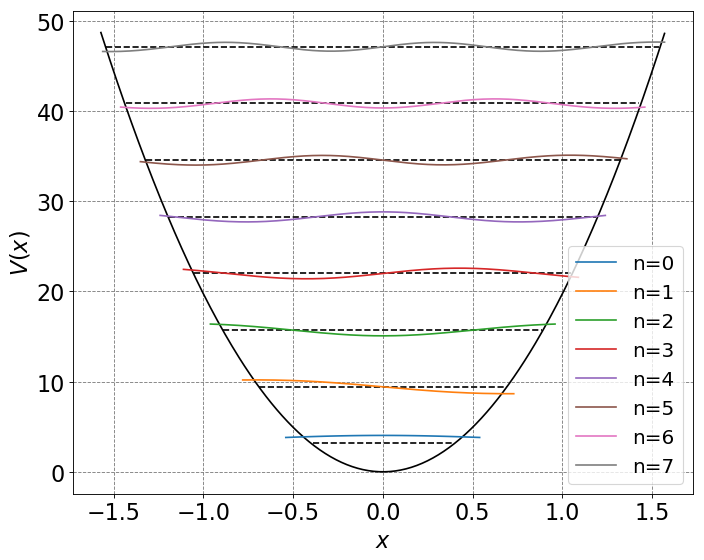

In [2]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial

# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
for n in range(8):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    # compute and plot wavefunctions
    psi = (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x**2/2.0)
    Y = psi+evals  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real,label=label)
plt.legend(fontsize=18)

## Most Molecules Are in the Ground Vibrational State at Room Temperature

State # 0
Percent 99.99992400399722
State # 1
Percent 7.599594502981462e-05
State # 2
Percent 5.775388050038668e-11
State # 3
Percent 4.3890640632791005e-17
State # 4
Percent 3.335513247709685e-23


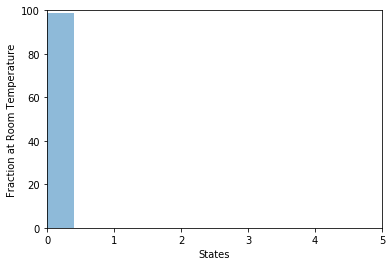

State # 0
Percent 65.24163765828136
State # 1
Percent 22.676924814936594
State # 2
Percent 7.882127695134769
State # 3
Percent 2.7396985045119
State # 4
Percent 0.9522743332688927


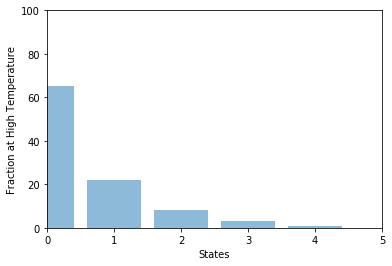

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def frac(nu,T):
    from scipy.constants import R,h,hbar,k
    vib = 4227 #for HCl, units of Kelvin
    #beta = 1/k/T
    return (1-np.exp(-1*vib/T))*np.exp(-1*nu*vib/T) #(1-np.exp(-1*beta*h*v))*np.exp(-beta*h*v*nu)

for nu in range(5):
    T = 300 # K
    States = frac(nu,T)
    States *= 100
    print("State #",nu)
    print("Percent",States)  

States = np.array([99,0,0,0,0])
nu = np.array([0,1,2,3,4])
plt.bar(nu, States, align='center', alpha=0.5)
plt.xlabel("States")
plt.ylabel("Fraction at Room Temperature")
plt.xlim(0.,5.,1.)
plt.ylim(0.,100.)
plt.show()    
    
for nu in range(5):
    T = 4000 # K
    States = frac(nu,T)
    States *= 100
    print("State #",nu)
    print("Percent",States)

#def Rounding(States):
#    States_round = []
#    for num in States:
#        if num < 0.001:
#             States_round.append(0)
#        else:
#            States_round.append(num)
#    return States_round

#States_round = Rounding(States)    

nu = np.array([0,1,2,3,4])
States = np.array([65,22,8,3,1])
plt.bar(nu, States, align='center', alpha=0.5)
plt.xlabel("States")
plt.ylabel("Fraction at High Temperature")
plt.xlim(0.,5.,1.)
plt.ylim(0.,100.)
plt.show()


# Morse Oscillator

Just like the harmonic oscillator, the energy levels of a Morse oscillator are also populated according to a Boltzmann population distribution. 

$$E_{morse} = \nu \left(n+\frac{1}{2}\right) - \nu x \left(n+\frac{1}{2}\right)^2 = \qquad \left(1\right) $$

$$ \nu \left(n+\frac{1}{2}\right) \left(1-x\left(n+\frac{1}{2}\right)\right) \qquad x = \frac{hc\nu}{4D} $$

Furthermore, the average energy (Equation 5), the enthalpy (Eqn. 6), the entropy (Eqn. 7), Gibbs free energy (Eqn. 8), and the heat capacity (Eqn. 9) of a Morse oscillator can also be determined from the Boltzmann distribution.

$$ \langle E \rangle = \sum_{s} E_s P_s = \frac{1}{Z}\sum_{s} E_s e^\frac{-E_s}{k_BT} \qquad \left(2\right) $$

$$ \langle H \rangle = \langle E \rangle + nRT \qquad \left(3\right) $$

$$ S = -k_B \sum_{s} P_s lnP_s \qquad \left(4\right) $$

$$ \Delta G = \Delta H - T\Delta S \qquad \left(5\right) $$

$$ C_v = \frac{\partial \langle E\rangle}{\partial T} = \frac{1}{k_BT}\langle\left(\Delta E\right)^2\rangle \qquad C_p = C_v +nR \qquad \left(6\right) $$


## Remember what the Morse Oscillator Potential Energy Curve Looks Like?

In [207]:
# code to perform Variational principle solution to expansion of wavefunctions in a gaussian basis to K+V Hamiltonian in 1D
from scipy import integrate

# integrand for potential component of Hamiltonian matrix element for gaussian basis functions
def integrand(x,V,xi,xj,alpha):
    return np.exp(-alpha*(x-xi)**2)*V(x)*np.exp(-alpha*(x-xj)**2) #trial wavefunction 
#this function is generic! Can substitute any potential operator into the V(x) placeholder

# variational principle basis set solution for KE plus V (typically harmonic) - basis functions are guassians
def basis_V(N,V,xvals=np.arange(-4,4,0.1)):
    #N = 3                       # half the number of basis functions
    K = 2*N+1                    # total number of basis functions #keeps K above zero, which keeps i and j greater than zero
    dx = 0.4                     # spacing between basis functions
    alpha = 1.0                  # 1/spread of basis functions
    xmin = -N*dx                 # minimum x value for basis functions
    xIntegrand = np.arange(xmin-1.0/alpha*10,N*dx+1.0/alpha*10,0.01) #ten standard deviations from the maximum of the gaussians at the farthest x values
    S = np.zeros((K,K),dtype=float)   # basis function overlap matrix
    H = np.zeros((K,K),dtype=float)   # Hamiltonian matrix, Hij = <gi|H|gj>

    # populate the basis function, S, and Hamiltonian, H, matrices
    for i in range(K):
        xi = xmin + (i-1)*dx
        for j in range(K):
            xj = xmin + (j-1)*dx
            # basis function value:
            # Ostlund and Szabo page 47
            S[i,j] = np.sqrt(0.5*np.pi/alpha)*np.exp(-0.5*alpha*(xi-xj)**2)
            # Hamiltonian value (standard Harmonic Oscillator matrix element - applied to basis functions)
            H[i,j] = 0.5*S[i,j]*(alpha - (alpha**2)*(xi-xj)**2) # Kinetic energy #the kinetic energy operator is identical for any type of oscillator (morse, lennard jones, harmonic, anharmonic, etc)
#            H[i,j] += integrate.quad(integrand,-np.inf,np.inf,args=(V,xi,xj,alpha))[0] # potential energy using numeric integration
            H[i,j] += integrate.simps(integrand(xIntegrand,V,xi,xj,alpha),xIntegrand)
    # finalize the S^-1*H*S matrix
    SinvH = np.dot(np.linalg.inv(S),H)
    # compute eigenvalues and eigenvectors
    H_eig_val, H_eig_vec = np.linalg.eig(SinvH)
    # reorder these so largest eigenvalue is first
    idx = H_eig_val.argsort()   
    H_eig_val = H_eig_val[idx]
    H_eig_vec = H_eig_vec[:,idx]

    nx = xvals.size
    psi = np.zeros((nx,K),dtype=float)
    psiNorm = np.empty(xIntegrand.size,dtype=float)
    # generate psis from coefficients
    for A in range(K):
        count = K-A-1
        psiNorm = 0.0
        for i in range(K):
            xi = xmin + (i-1)*dx
            psi[:,A] = psi[:,A] + H_eig_vec[i,A]*np.exp(-alpha*(xvals-xi)**2)
            psiNorm = psiNorm + H_eig_vec[i,A]*np.exp(-alpha*(xIntegrand-xi)**2)
    
        # normalize the wavefunctions
        psi2 = np.power(psiNorm,2)
        norm = float(integrate.simps(psi2,xIntegrand))
        psi[:,A] /= np.sqrt(norm)
    # return normalized wavefunctions and energies
    return psi, H_eig_val

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: ComplexWarning: Casting complex values to real discards the imaginary part
/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


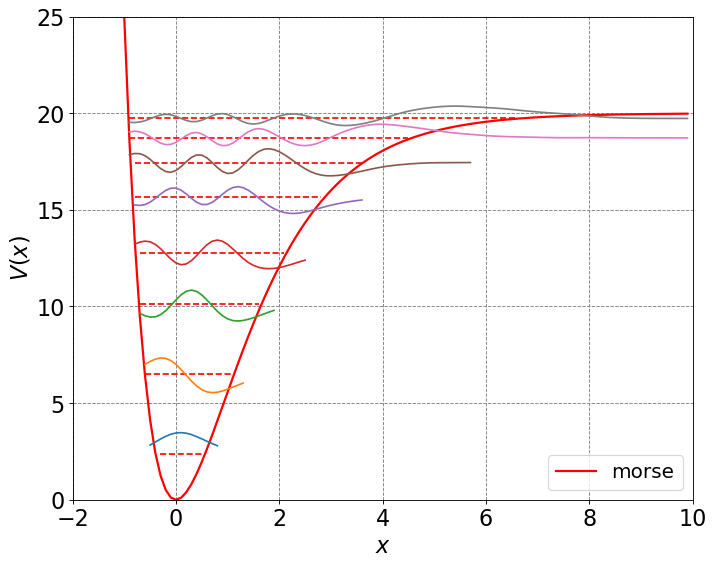

In [208]:
De = 20.0
beta = 0.75
xvals = np.arange(-3,10,0.1)

def morse(x):
    return De*(1-np.exp(-beta*x))**2 #this is not the taylor-expansion of the morse potential, but rather the complete function!


# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")

# compute potential energies #simply input of domain values, output of y values
U_morse = morse(xvals)

# plot potential energies
ax.plot(xvals, morse(xvals), 'r',lw=2,label="morse")

# compute wavefunctions and energies for these potential functions
psi_morse, E_morse = basis_V(18,morse,xvals) #uses the above code

#print(psi_morse)
#print(psi_morse.size)

# plot morse energy levels and wavefunctions
for n in range(10):
    if (E_morse[n] <= De):
        # plot the energy level
        mask = np.where(E_morse[n] > U_morse)  
        ax.plot(xvals[mask], E_morse[n] * np.ones(np.shape(xvals))[mask], 'r--')
        # plot the wavefunction
        Y = psi_morse[:,n]+E_morse[n]
        mask = np.where(Y > U_morse-2.0)
        ax.plot(xvals[mask], Y[mask].real)  
        
ax.set_xlim(-2, 10)
ax.set_ylim(0, 25)
ax.legend(loc=4,fontsize=18)

## Calculating Thermodynamic Quantities: Heat Capacity

In [203]:
import numpy as np
from scipy.constants import h, c, k as kB, R

# Speed of light in cm.s-1
c *= 100
hc = h * c

def calc_sum(get_term, max_terms=500, TINY=1.e-100):
    """Sum a finite or absolutely convergent series to convergence.

    The terms in the series are returned by the get_term iterator. No more than
    max_terms are summed, and convergence is assumed when a term is not zero
    but smaller than TINY.

    """

    terms = []
    for i in range(max_terms):
        try:
            term = next(get_term)
        except StopIteration:
            break
        if term and term < TINY:
            break
        terms.append(term)
    else:
        if terms[-1] >= TINY:
            print('Warning: maximum number of iterations reached in calc_sum.')
    return np.math.fsum(terms)

def get_term(beta, gfunc, Efunc, calc_term, args=()):
    """A generator returning each term in the partition sum or its derivative.

    The energy and degeneracy for the ith term are returned by Efunc and gfunc
    respectively. Any arguments they require beyond i should be passed in the
    tuple args. If Efunc should return None to signal the end of the series.
    The function calc_term should calculate the term given beta, g and E.

    """

    i = 0
    while True:
        E = Efunc(i, *args)
        if E is None:
            return None
        yield calc_term(beta, gfunc(i, *args), E)
        i += 1

def calc_q_term(beta, g, E):
    """Return a term from the partition sum.

    beta = (kB.T)^-1 in J, g is the degeneracy and E, the energy, is in cm-1.

    """

    return g * np.exp(-E * h * c * beta)

def calc_qdot_term(beta, g, E):
    """Return a term from the first derivative of partition sum wrt beta.

    beta = (kB.T)^-1 in J, g is the degeneracy and E, the energy, is in cm-1.
    The qdot=dq/dbeta term is returned in units of cm-1.

    """

    return E * calc_q_term(beta, g, E)

def calc_qdotdot_term(beta, g, E):
    """Return a term from the second derivative of partition sum wrt beta.

    beta = (kB.T)^-1 in J, g is the degeneracy and E, the energy, is in cm-1.
    The qdotdot=d2q/dbeta2 term is returned in units of cm-2.

    """

    return E * calc_qdot_term(beta, g, E)

def calc_q(beta, gfunc, Efunc, args=()):
    """Return the partition sum, q, at beta = (kB.T)^-1.

    gfunc and Efunc are functions returning the degeneracy and energy of the
    ith term in the partition sum. Any arguments they require beyond i should
    be passed in the tuple args.

    """
    return calc_sum(get_term(beta, gfunc, Efunc, calc_q_term, args))

def calc_qdot(beta, gfunc, Efunc, args=()):
    """Return the first derivative partition sum at beta = (kB.T)^-1.

    gfunc and Efunc are functions returning the degeneracy and energy of the
    ith term in the partition sum. Any arguments they require beyond i should
    be passed in the tuple args. qdot = dq/dbeta is returned in units of J

    """
    return - hc * calc_sum(get_term(beta, gfunc, Efunc, calc_qdot_term, args))

def calc_qdotdot(beta, gfunc, Efunc, args=()):
    """Return the second derivative of the partition sum at beta = (kB.T)^-1.

    gfunc and Efunc are functions returning the degeneracy and energy of the
    ith term in the partition sum. Any arguments they require beyond i should
    be passed in the tuple args. qdotdot = d2q/dbeta2 is returned in units
    of J^2.

    """
    return hc**2 * calc_sum(get_term(beta, gfunc, Efunc, calc_qdotdot_term,
                                     args))

def calc_qfuncs(Tgrid, gfunc, Efunc, args=()):
    """Calculate the partition sum and its first two derivatives on Tgrid.

    gfunc and Efunc are functions returning the degeneracy and energy of the
    ith term in the partition sum. Any arguments they require beyond i should
    be passed in the tuple args.

    """

    q = np.zeros_like(Tgrid)
    qdot = np.zeros_like(Tgrid)
    qdotdot = np.zeros_like(Tgrid)
    for i,T in enumerate(Tgrid):
        beta = 1/kB/T
        q[i] = calc_q(beta, gfunc, Efunc, args)
        qdot[i] = calc_qdot(beta, gfunc, Efunc, args)
        qdotdot[i] = calc_qdotdot(beta, gfunc, Efunc, args)
    return q, qdot, qdotdot

def calc_CV(Tgrid, gfunc, Efunc, args=()):
    """Calculate the heat capacity, CV, on the grid of temperatures, Tgrid.

    The Tgrid is a sequence of temperatures  in K.
    gfunc and Efunc are functions returning the degeneracy and energy of the
    ith term in the partition sum. Any arguments they require beyond i should
    be passed in the tuple args.
    The heat capacity at constant volume, CV, is returned in J.K-1.mol-1.

    """
    beta = 1 / kB / Tgrid
    q, qdot, qdotdot = calc_qfuncs(Tgrid, gfunc, Efunc, args)
    return R * beta**2 * (qdotdot/q - (qdot/q)**2)

29
q_sho(6000.0 K) = 2.1533069784039283


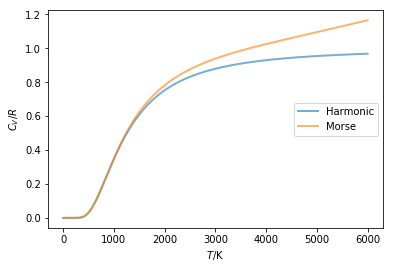

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k as kB, R

c *= 100 # Speed of light in cm.s-1
hc = h * c

we, wexe = 2648.975, 45.217 # Morse parameters for HBr, cm-1
vmax = int(we/2/wexe) # Maximum quantum number v within Morse approximation
print(vmax)
nu = we - wexe # Approximate harmonic vibrational wavenumber, cm-1
T = np.linspace(1,6000,501) # Temperature grid, K

# To get a feel for how many vibrational levels are thermally accessible,
# calculate the simple Harmonic oscillator approximation partition sum
Tmax = T[-1]
qsho_max = 1./(1-np.exp(-hc*nu/kB/Tmax)) #partition function, simple harmonic oscillator, at max temperature
print('q_sho({} K) = {}'.format(Tmax, qsho_max))

# Functions for calculating terms in the partition sum and its derivatives
def gvib(v, *args):
    # Vibrational energy levels of closed-shell diatomics are non-degenerate.
    return 1

def Esho(v, nu):
    """Return the Harmonic approximation energy for v, with E=0 for v=0."""
    return nu * v

def Emorse(v, we, wexe, vmax):
    """Return the Morse approximation energy for v, with E=0 for v=0."""
    if v > vmax:
        return None
    return we * v - wexe * v**2

CVsho = calc_CV(T, gvib, Esho, args=(nu,))
CVmorse = calc_CV(T, gvib, Emorse, args=(we, wexe,vmax))


x = hc*nu/kB/T
CVsho_analytical = R * x**2 * np.exp(-x)/(1-np.exp(-x))**2 #for a Diatomic, pg.702 in text

plt.plot(T, CVsho/R, label="Harmonic", lw=2, alpha=0.6)
#plt.plot(T, CVsho_analytical/R, marker='o', markevery=20, alpha=0.6)
plt.plot(T, CVmorse/R, label="Morse", lw=2, alpha=0.6)
plt.legend(loc=5)
plt.xlabel("$T/\mathrm{K}$")
plt.ylabel("$C_V/R$")
#plt.savefig('HBr-CV.png')
plt.show()


## Practice: Plot the Enthalphy vs Temperature and Entropy vs Temperature Curves for a Harmonic and Morse Oscillator